In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [90]:
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished.head()

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [91]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [92]:
df_merged = pd.concat([paths_finished, paths_unfinished], ignore_index=True)
df_merged.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN,NaN,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,NaN,NaN
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,NaN,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,NaN,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,NaN,NaN


In [93]:
# for each row add a column with the number of path that the user has done before
#use cumcount on the groupby hashedIpAddress sorted by timestamp
df_merged['numberOfPath'] = df_merged.sort_values(by=['timestamp']).groupby('hashedIpAddress').cumcount() + 1
df_merged.head()

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type,numberOfPath
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN,NaN,NaN,3.0
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,NaN,NaN,13.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,NaN,NaN,20.0
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,NaN,NaN,2.0
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,NaN,NaN,1.0


In [94]:
df_merged.loc[df_merged['hashedIpAddress'] == '0d57c8c57d75e2f5'].sort_values(by=['timestamp'])

,hashedIpAddress,timestamp,durationInSec,path,rating,target,type,numberOfPath
26546,0d57c8c57d75e2f5,2010-06-02 11:56:34,263,Alchemy;Planet;<;Nintendo;United_States;Basket...,2.0,NaN,NaN,1.0
890,0d57c8c57d75e2f5,2010-06-02 12:15:09,60,Art;Human;Herbivore;Fruit;Mango,3.0,NaN,NaN,2.0
891,0d57c8c57d75e2f5,2010-06-02 12:16:42,154,Art;Abstract_art;<;Human;Agriculture;Food;<;Fr...,NaN,NaN,NaN,3.0
8425,0d57c8c57d75e2f5,2010-06-02 12:24:22,405,Wikimedia_Foundation;Wikipedia;Encyclop%C3%A6d...,NaN,NaN,NaN,4.0
8426,0d57c8c57d75e2f5,2010-06-02 12:33:58,974,Wikimedia_Foundation;Wikisource;<;United_State...,5.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...
36643,0d57c8c57d75e2f5,2011-02-06 21:10:02,286,Charles_I_of_England;United_States;Medicine;He...,NaN,NaN,NaN,4861.0
29464,0d57c8c57d75e2f5,2011-02-06 22:02:23,66,Gorilla;Human;Music;Ludwig_van_Beethoven;Opera,NaN,NaN,NaN,4862.0
21726,0d57c8c57d75e2f5,2011-02-06 22:13:03,177,North_Korea;Country;United_States;Rocky_Mounta...,4.0,NaN,NaN,4863.0
30431,0d57c8c57d75e2f5,2011-02-06 22:22:22,138,Cave;United_States;President_of_the_United_Sta...,2.0,NaN,NaN,4864.0


In [123]:
#how many users have more than 400 paths?
print(df_merged[df_merged['numberOfPath'] == 401]["hashedIpAddress"])
#we will exclude them for the following plots
df_merged = df_merged[~df_merged["hashedIpAddress"].isin(df_merged[df_merged['numberOfPath'] == 401]["hashedIpAddress"])]

24406    473d6ac602c2b198
29683    0d57c8c57d75e2f5
Name: hashedIpAddress, dtype: object


[(0.0, 100.0)]

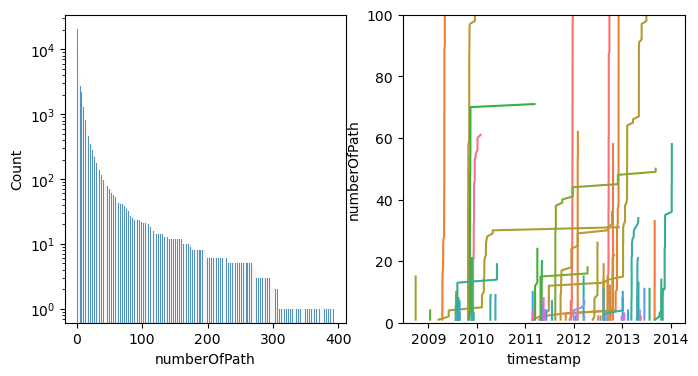

In [130]:
fig, axs = plt.subplots(figsize=(8,4), nrows=1, ncols=2)
#plot the distribution of the number of path
sns.histplot(data=df_merged, x='numberOfPath', ax=axs[0]).set(yscale='log')
#check that the transformation is correct by looking if the number of path is increasing in function of the timestamp
#chose a sample of hashedIpAddress
sample = df_merged['hashedIpAddress'].sample(n=100, random_state=1).unique()
sns.lineplot(data=df_merged[df_merged['hashedIpAddress'].isin(sample)], x='timestamp', y='numberOfPath', hue='hashedIpAddress', legend=False, ax=axs[1]).set(ylim=(0, 100))

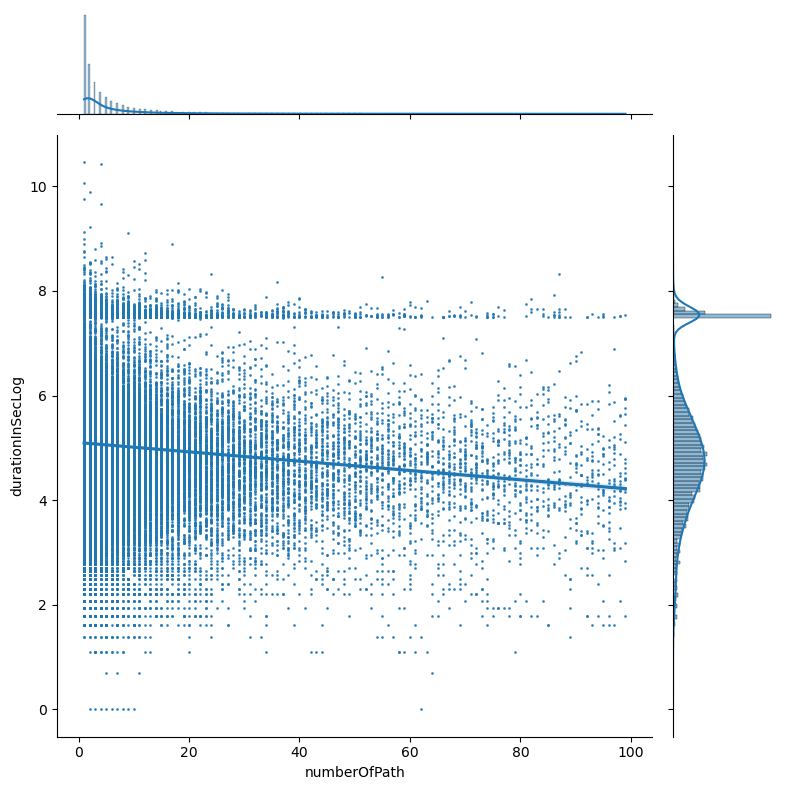

In [139]:
#plot correlation between number of path and duration
#since the density of the data is very high, we will use small points
df_merged['durationInSecLog'] = np.log(df_merged['durationInSec']+1)
sns.jointplot(data=df_merged.loc[df_merged["numberOfPath"]<100], x='numberOfPath', y='durationInSecLog', kind='reg', height=8, scatter_kws={'s':1})

we find a negative correlation as expected